For this script, we used the wider set of EF measures. so we could use feature selection etc. 
This was in "MB_EF_Detail_Reduced_Dec21" at first. Let's use this again.

In [1]:
from numpy import absolute, mean, std
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import os  

import random

random.seed(10)

# https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [2]:
print(random.random())

0.5714025946899135


In [3]:
#work_p = "C:/Users/claire.smid/Documents/Main_STUDY/Model-based_learning_mainstudy/"

work_p = "C:/Users/claire.smid/Documents/DCP/Writing/Thesis/Chapter2/"

# Including all decision making, EFs and mental health:
#dataset = pd.read_csv(work_p+"All_DMs_EFs_MHs_Nov21.csv", sep=',') 

# Including all decision making and EFs
#dataset = pd.read_csv(work_p+"All_DMs_EFs_Nov21.csv", sep=',') 

# Including EFs and MB only
#dataset = pd.read_csv(work_p+"MB_EFs_Only_Nov21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MB_EF_Detail_Imputed_Dec21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MB_EF_Detail_Imputed_REDUCED_Dec21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MBMF_EF_Detail_Imp_6Jun2022.csv", sep=',') 
dataset = pd.read_csv(work_p+"MBMF_EF_Detail_Imp_9Jun2022.csv", sep=',') 
pd.options.display.max_columns = 100

dataset

,ID,Session,School,Gender,Age_Frac_Imp,SES_inv_z,Avg_Pts,Avg_Pts_lo,Avg_Pts_hi,w_P6,w_diff,it_P6,lr_P6,eg_P6,st_P6,repst_P6,it,lr,eg,st,repst,T_Vocab,T_Matrix,Corsi_WM_Span,CogFlex_t,SSRT,FlankerSwitch_t,FlankerInhib_t,Stroop_t,AY_RCS,BX_RCS,Nback_1_RCS,Nback_2_RCS,CF_Mix_RCS_Diff,SSRT_SSD_z
0,1,0,Trevor Roberts School,M,12.444444,0.226732,0.013173,-0.002222,0.029551,0.425788,0.121567,0.619787,0.437227,0.419932,-0.177439,-0.709067,0.625122,0.442486,0.420558,-0.177359,-0.704026,62,66,7,0.524022,-0.798678,0.035289,-0.303618,-0.818045,1.785449,0.927080,0.241960,0.114083,-0.699165,0.316186
1,4,0,Trevor Roberts School,F,11.838889,-0.587075,0.024752,0.004831,0.041414,0.528114,-0.142475,0.804932,0.698279,0.486952,-0.435025,-0.862134,0.812849,0.685928,0.486859,-0.426516,-0.851632,55,50,5,1.152471,0.028908,0.242714,0.563637,-0.013837,0.985358,1.401536,0.272975,0.123974,-0.018518,-0.640517
2,5,0,Trevor Roberts School,M,7.611111,1.040539,0.043889,0.037037,0.052972,0.770192,0.132597,0.880334,0.755154,0.530449,-0.589862,-0.083494,0.846292,0.747178,0.556262,-0.601976,-0.080824,66,55,4,-1.093324,-0.380691,0.525759,-0.140001,-0.205424,0.990982,0.373066,0.117747,0.174845,-0.171262,0.880708
3,8,0,Trevor Roberts School,M,6.747222,0.226732,0.013740,-0.022676,0.054293,0.582383,0.028154,0.651551,0.764537,0.577141,0.588800,0.396509,0.652178,0.783163,0.582775,0.589636,0.395179,64,61,4,0.458539,-1.489266,-0.041334,-0.248403,1.083356,0.562811,0.437377,0.102242,0.228547,-0.138648,-0.071924
4,15,0,Trevor Roberts School,M,10.600000,0.226732,-0.014891,0.016414,-0.040881,0.448529,-0.036160,0.553742,0.489282,0.530107,-0.303803,-1.629661,0.553467,0.487266,0.528799,-0.305209,-1.630474,55,62,6,-0.133400,0.016327,-0.679340,-0.246747,0.085989,0.461337,0.558434,0.216780,0.260057,0.025455,-1.590435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0,Broadfields,M,10.486111,-2.214688,0.098073,0.071605,0.120545,0.422117,0.117357,0.433004,0.519166,0.491737,0.173996,-0.269121,0.436899,0.517092,0.471755,0.175653,-0.262585,41,56,6,0.329597,0.200856,-0.572747,0.212403,0.187235,1.589251,2.482398,0.174274,0.156276,0.034773,1.374665
65,195,0,Merton Court,M,10.372222,-0.587075,-0.017052,-0.065302,0.045455,0.610913,-0.218845,0.445750,0.349609,0.394229,-0.074491,-0.851411,0.453946,0.367773,0.398445,-0.070527,-0.840291,58,64,6,0.680336,-0.707812,-0.136637,0.689489,-0.980713,0.913796,1.094341,0.217520,0.150937,-0.266687,-1.236251
66,196,0,Orley Farm,M,8.608333,0.498001,0.057756,0.049645,0.064815,0.718295,0.107204,1.381509,0.868366,0.658000,0.382585,-0.281852,1.387507,0.884099,0.678044,0.386831,-0.277990,64,52,5,-0.330512,0.909617,0.208257,-0.148340,-0.622866,1.036768,0.302673,0.209424,0.273568,-0.564426,0.139772
67,202,0,Newland House,F,11.236111,1.040539,0.044004,0.045351,0.042735,0.893768,0.043038,1.296684,0.839617,0.514458,0.758670,-0.065990,1.165809,0.808938,0.521772,0.873589,-0.060433,63,54,7,0.458539,-0.562425,-0.814565,0.551108,-0.565334,0.818956,0.818888,0.140716,0.135013,0.012360,-1.571437


In [4]:
os.chdir("C:/Users/claire.smid/Documents/DCP/Writing/Thesis/Chapter2/")
os.getcwd()

'C:\\Users\\claire.smid\\Documents\\DCP\\Writing\\Thesis\\Chapter2'

In [5]:
# one hot encoding
dataset.Gender.replace(to_replace=['M','F'],value=[1,0],inplace=True)

In [6]:
# from column 8 onwards no more model parameters, or maybe just include all?
# now including only the EFs for the first approach, and splitting factors for the later approach
#X = dataset.iloc[:, np.r_[4:5,10:len(dataset.columns)]]

# # 6 jun dataset
# X = dataset.iloc[:, np.r_[14:34]]
# X_cols = X
# y = dataset.iloc[:,8]

# 7 jun dataset
X = dataset.iloc[:, np.r_[21:35]]
X_cols = X
y = dataset.iloc[:,12]

In [7]:
#y = y.reshape(len(y),1)

In [8]:
X

,T_Vocab,T_Matrix,Corsi_WM_Span,CogFlex_t,SSRT,FlankerSwitch_t,FlankerInhib_t,Stroop_t,AY_RCS,BX_RCS,Nback_1_RCS,Nback_2_RCS,CF_Mix_RCS_Diff,SSRT_SSD_z
0,62,66,7,0.524022,-0.798678,0.035289,-0.303618,-0.818045,1.785449,0.927080,0.241960,0.114083,-0.699165,0.316186
1,55,50,5,1.152471,0.028908,0.242714,0.563637,-0.013837,0.985358,1.401536,0.272975,0.123974,-0.018518,-0.640517
2,66,55,4,-1.093324,-0.380691,0.525759,-0.140001,-0.205424,0.990982,0.373066,0.117747,0.174845,-0.171262,0.880708
3,64,61,4,0.458539,-1.489266,-0.041334,-0.248403,1.083356,0.562811,0.437377,0.102242,0.228547,-0.138648,-0.071924
4,55,62,6,-0.133400,0.016327,-0.679340,-0.246747,0.085989,0.461337,0.558434,0.216780,0.260057,0.025455,-1.590435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,41,56,6,0.329597,0.200856,-0.572747,0.212403,0.187235,1.589251,2.482398,0.174274,0.156276,0.034773,1.374665
65,58,64,6,0.680336,-0.707812,-0.136637,0.689489,-0.980713,0.913796,1.094341,0.217520,0.150937,-0.266687,-1.236251
66,64,52,5,-0.330512,0.909617,0.208257,-0.148340,-0.622866,1.036768,0.302673,0.209424,0.273568,-0.564426,0.139772
67,63,54,7,0.458539,-0.562425,-0.814565,0.551108,-0.565334,0.818956,0.818888,0.140716,0.135013,0.012360,-1.571437


In [9]:
#X['SSRT_SSD_z'] = X['SSRT_SSD_z']*-1

In [10]:
y

0     0.437227
1     0.698279
2     0.755154
3     0.764537
4     0.489282
        ...   
64    0.519166
65    0.349609
66    0.868366
67    0.839617
68    0.277862
Name: lr_P6, Length: 69, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

In [12]:
X

array([[ 3.92986510e-01,  1.04805356e+00,  1.86614836e+00,
         8.23574689e-01, -7.81869423e-01,  5.14227132e-02,
        -7.91541408e-01, -1.14774038e+00,  2.33977314e+00,
        -1.67049472e-01,  1.32390928e+00, -9.79182095e-01,
        -1.80267629e+00,  3.19632030e-01],
       [-2.27315726e-01, -4.74382139e-01, -4.33213013e-01,
         2.10259875e+00,  1.12205581e-01,  4.10626096e-01,
         8.80136899e-01,  8.30817957e-02,  3.75047124e-01,
         4.12708533e-01,  1.89369121e+00, -8.32491758e-01,
         5.01649464e-01, -6.27238185e-01],
       [ 7.47444930e-01,  1.37901785e-03, -1.58289370e+00,
        -2.46805900e+00, -3.30301201e-01,  9.00782032e-01,
        -4.76162864e-01, -2.10138461e-01,  3.88856993e-01,
        -8.44022715e-01, -9.58026890e-01, -7.80304985e-02,
        -1.54642888e-02,  8.78352611e-01],
       [ 5.70215720e-01,  5.72292406e-01, -1.58289370e+00,
         6.90302678e-01, -1.52793872e+00, -8.12659299e-02,
        -6.85112426e-01,  1.76230932e+00, -6.

## LOOCV with all features

In [13]:
# find number of samples
n = X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))


MSE: -0.069 (0.095)


## Find the best predictors using RFE

In [14]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE

# create pipeline
rfe = RFECV(estimator=SVR(kernel = 'linear'),min_features_to_select=2)
model = SVR(kernel = 'linear')
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# find number of samples
n = X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# evaluate model
#rfe.fit(X,y)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=n)
# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

MSE: -0.054 (0.080)


### Predicting the best results

In [15]:
# find out which predictors
rfe.fit(X,y)

data_top = X_cols.columns
# summarise all features
for i in range(X.shape[1]):
    print('Selected %s,\t Rank: %.1f, \tName: %s' % (rfe.support_[i], rfe.ranking_[i],data_top[i]))

Selected False,	 Rank: 10.0, 	Name: T_Vocab
Selected False,	 Rank: 13.0, 	Name: T_Matrix
Selected False,	 Rank: 6.0, 	Name: Corsi_WM_Span
Selected False,	 Rank: 7.0, 	Name: CogFlex_t
Selected True,	 Rank: 1.0, 	Name: SSRT
Selected False,	 Rank: 4.0, 	Name: FlankerSwitch_t
Selected False,	 Rank: 11.0, 	Name: FlankerInhib_t
Selected False,	 Rank: 2.0, 	Name: Stroop_t
Selected False,	 Rank: 8.0, 	Name: AY_RCS
Selected False,	 Rank: 9.0, 	Name: BX_RCS
Selected False,	 Rank: 3.0, 	Name: Nback_1_RCS
Selected False,	 Rank: 12.0, 	Name: Nback_2_RCS
Selected False,	 Rank: 5.0, 	Name: CF_Mix_RCS_Diff
Selected True,	 Rank: 1.0, 	Name: SSRT_SSD_z


## Use permutation testing to find the best predictors

In [16]:
from sklearn.model_selection import RepeatedKFold
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights, explain_weights

Xfeature_names = X_cols.columns

# create pipeline
regressor = SVR(kernel = 'rbf')

cv = RepeatedKFold(n_splits=6, n_repeats=100, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(X,y)

show_weights(perm, feature_names = X_cols.columns.tolist())
#explain_weights(perm, feature_names = X.columns.tolist())
#show_prediction(perm, X.iloc[4], feature_names = X.columns.tolist())

C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Weight,Feature
0.0620 ± 0.4397,SSRT_SSD_z
-0.0133 ± 0.2388,T_Vocab
-0.0360 ± 0.2869,FlankerSwitch_t
-0.0493 ± 0.2412,CogFlex_t
-0.0521 ± 0.2823,Nback_2_RCS
-0.0605 ± 0.3241,BX_RCS
-0.0618 ± 0.3142,T_Matrix
-0.0659 ± 0.2750,AY_RCS
-0.0667 ± 0.2327,Corsi_WM_Span
-0.0684 ± 0.3140,SSRT


[-0.01328067 -0.06184221 -0.06671794 -0.04930662 -0.06837362 -0.03600035
 -0.07101767 -0.07718104 -0.06594218 -0.0605291  -0.11042549 -0.05211609
 -0.06929109  0.06196068]
Feature: 0, Score: 0.06196
Feature: 1, Score: -0.01328
Feature: 2, Score: -0.03600
Feature: 3, Score: -0.04931
Feature: 4, Score: -0.05212
Feature: 5, Score: -0.06053
Feature: 6, Score: -0.06184
Feature: 7, Score: -0.06594
Feature: 8, Score: -0.06672
Feature: 9, Score: -0.06837
Feature: 10, Score: -0.06929
Feature: 11, Score: -0.07102
Feature: 12, Score: -0.07718
Feature: 13, Score: -0.11043


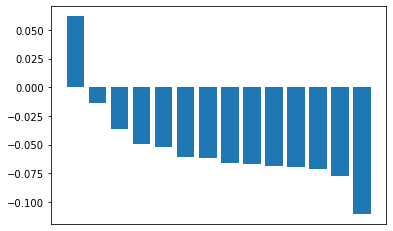

In [17]:
importance = perm.feature_importances_
names = X_cols.columns.tolist()
#print(importance)
print(importance)
f_sorted = sorted(importance, reverse = True)

# summarize feature importance
for i,v in enumerate(f_sorted):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(f_sorted))], f_sorted)
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.show()

## Hyperparameter tuning

In [221]:
regressor.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for metacontrol
#X = dataset[["Max_Span","T_Matrix"]]
X = dataset[["SSRT_SSD_z"]]
#X = dataset[["Stroop_t","FlankerInhib_t","Flank_InCon_RCS_Diff"]]
X_cols = X
#X = dataset[["Stroop_t"]]
# for w
#X = dataset[["Max_Span"]]

X = scaler.fit_transform(X)

# find number of samples
n = X.shape[0]

# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR()
# define search space
#space = dict()
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
#space['alpha'] =  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
#space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
parameters = {'kernel': ['linear','rbf'], 'C':[0.1, 0.5, 1, 1.5, 2, 5, 10, 20],
              'gamma': [1e-7, 1e-4, 1e3, 0.01, 0.1, 0.2],'epsilon':[0.1,0.2,0.5,0.3],
             'max_iter': [-1]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#space['parameters'] = {'kernel':('linear','rbf'), 'C':[1.5]}
# define search
search = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=cv, n_jobs = -1)
# execute search
result = search.fit(X,y)

# evaluate model
#scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# summarize result
print('Best MSE Score: %s' % result.best_score_)
print('Best Hyperparameters %s' % result.best_params_ )


Best MSE Score: -0.04813078285238171
Best Hyperparameters {'C': 1, 'epsilon': 0.2, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1}


## K-fold cross validation with tuned model and best predictors

In [23]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold

# make the model manually with the predictors
#X = dataset[["flankerinh_t0"]]
#X = dataset[["flankerinh_t0","stroop_t0"]]
#X = dataset[["flankerinh_t0","flankerswitch_t0","dprimeONEBACK_t0","dprimeTWOBACK_t0",
           # "AXCPT_CorrRT_Shift_Index","AY_RCS","BX_RCS","Stroop_InCon_IES_Diff",
           # "SSRT_mean_ssd","CF_Mix_IES_Diff"]]

# create pipeline
#regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.2)
#regressor = SVR(kernel = 'linear', C = 1, epsilon = 0.5, gamma = 1e-07)
#regressor = SVR(kernel = 'rbf', C = 0.5, epsilon = 0.1, gamma = 0.1, max_iter=-1)

regressor = SVR(kernel = 'rbf', C = 1, epsilon = 0.2, gamma = 0.01, max_iter=-1)
#regressor = SVR(kernel = 'sigmoid', C = 5, epsilon = 0.1, gamma = 0.2, max_iter=-1)
# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.049 (0.016)
r2: -0.049 (0.091)
exp var: 0.011


## new results:
### corsi, matrix
- MSE: -0.029
- r2: -0.183
- exp var: -0.011


In [231]:
#X = dataset[["flankerinh_t0","stroop_t0"]]
Xfeature_names = X_cols.columns

# create pipeline
regressor = SVR(kernel = 'rbf')

cv = RepeatedKFold(n_splits=6, n_repeats=100, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(X,y)

show_weights(perm, feature_names = X_cols.columns.tolist())
#show_prediction(perm, X.iloc[4], feature_names = X.columns.tolist())

C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Weight,Feature
0.2290 ± 0.8584,Stroop_t
0.0314 ± 0.6865,FlankerInhib_t


## Repeat with PCA

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)

# from column 8 onwards no more model parameters, or maybe just include all?
# now including only the EFs for the first approach, and splitting factors for the later approach
X = dataset.iloc[:, np.r_[14:34]]
X_cols = X
y = dataset.iloc[:,8]

pca.fit(X)
pc_X = pca.transform(X)

# find number of sam`aples
n = pc_X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# create model
regressor = SVR(kernel = 'rbf')
# evaluate model
scores = cross_val_score(regressor, pc_X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
principalDF = pd.DataFrame(data = pc_X)
principalDF

,0
0,-506.436158
1,-869.730993
2,548.839333
3,829.517722
4,-180.606737
...,...
64,-773.641050
65,-770.911363
66,-643.700990
67,-449.336181


## Then run rfe again

In [40]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold

# create pipeline
rfe = RFECV(estimator=SVR(kernel = 'rbf'),min_features_to_select=1)
model = SVR(kernel = 'rbf')
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, pc_X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, pc_X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, pc_X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.041 (0.018)
r2: -0.220 (0.254)
exp var: -0.102


In [41]:
# # find out which predictors
# rfe.fit(pc_X,y)
# data_top=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
# # data_top = ['MemSpeed_negBXRCS','posBXRCS_MemSpeed','PBI_InConIES',
# #                                                    'negSwitchIES_negPBI','DP2_negCFSwitchIES',
# #                                                    'negCFSwitchIES_InconIES','negInConIES_AYRCS']
# # summarise all features
# for i in range(pc_X.shape[1]):
#     print('row: %d, Selected %s,\t Rank: %.1f, \tName: %s' % (i, rfe.support_[i], rfe.ranking_[i],data_top[i]))

## Then run permutation testing again

In [43]:
from sklearn.model_selection import RepeatedKFold
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights

#data_top=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
data_top=['PC1']
Xfeature_names = data_top

# create pipeline
regressor = SVR(kernel = 'rbf')

cv = RepeatedKFold(n_splits=6, n_repeats=10, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(pc_X,y)

show_weights(perm, feature_names = Xfeature_names)
#show_prediction(perm, X.iloc[4], feature_names = X.columns.tolist())

C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Weight,Feature
-0.0181 ± 0.5289,PC1


## Hyper parameter testing

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# if only one variable
#var = pc_X[:,5]
var = pc_X
X = var.reshape(len(var),1)

# if more than 1
#X = pc_X[:,[5,9]]

# find number of samples
n = X.shape[0]

# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
# define search space
#space = dict()
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
#space['alpha'] =  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
#space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
parameters = {'kernel': ['linear','rbf'], 'C':[1.5, 10],'gamma': [1e-7, 1e-4, 1e-3, 0.01, 0.1, 0.2],'epsilon':[0.1,0.2,0.5,0.3]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#space['parameters'] = {'kernel':('linear','rbf'), 'C':[1.5]}
# define search
search = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=cv, n_jobs = -1)
# execute search
result = search.fit(X,y)

# evaluate model
#scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# summarize result
print('Best MSE Score: %s' % result.best_score_)
print('Best Hyperparameters %s' % result.best_params_ )


## Then use k-fold cross validation again to test final model

In [30]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold


# create pipeline
regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.0001)
#regressor = SVR(kernel = 'linear', C = 1, epsilon = 0.5, gamma = 1e-07)
# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.039 (0.016)
r2: -0.113 (0.143)
exp var: 0.015


### for one predictor (PC4)
- MSE -0.039
- r2 -0.113
- exp var 0.015

### for two predictor (PC4 and 8)
- MSE -0.040
- r2 = -0.126
- exp var = 0.004